# Visulaziation prediction error

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpcCARLA.visualization_tools as vis

## Filename of log files

In [4]:
log_path = 'logs/'
file1 = log_path + 'xi_kappa.h5'
file2 = log_path + 'frenet_mpc_speed_limit2.h5'
file3 = log_path + 'MPC_manual_control.h5'
file4 = log_path + 'MPC_TM.h5'
file5 = log_path + 'test.h5'


## Visualization of the frenet states

In [6]:
data = vis.read_log_informations(file5)
data

,Eta,PSI,Theta,Velocity,X,Xi,Y,computation_time,curvature_radius,kappa,kappa_state,pred_control,pred_states,target_velocity,u_acceleration,u_steering_angle,velocity_error
timestamp,,,,,,,,,,,,,,,,,
0.00,0.000000e+00,1.749256,0.000000,0.190142,13.294687,0.0,-186.781479,0.000000,0.000000e+00,0.000000e+00,NaN,"[0, 0]","[13.294687271118164, -186.78147888183594, 1.74...",NaN,0.000000,0.000000e+00,NaN
0.00,2.730722e-07,1.749256,0.174536,0.049093,13.294687,0.0,-186.781479,0.080128,9.339283e+09,1.070746e-10,NaN,"[[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.71...","[[13.294687271118164, -186.78147888183594, 1.7...",30.0,5.000000,-1.262623e-01,-8.284240
0.03,2.730722e-07,1.749256,0.174536,0.035302,13.294687,0.0,-186.781479,0.009809,9.339283e+09,1.070746e-10,NaN,"[[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.71...","[[13.293876577243504, -186.77446516087616, 1.7...",30.0,5.000000,-1.262623e-01,-8.298031
0.07,2.730722e-07,1.749256,0.174536,0.024297,13.294687,0.0,-186.781479,0.012280,9.339283e+09,1.070746e-10,NaN,"[[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.71...","[[13.294129301450644, -186.77665160525925, 1.7...",30.0,5.000000,-1.262623e-01,-8.309036
0.10,2.730722e-07,1.749256,0.174536,0.015782,13.294687,0.0,-186.781479,0.012011,9.339283e+09,1.070746e-10,NaN,"[[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.71...","[[13.29432483520805, -186.77834326626166, 1.74...",30.0,5.000000,-1.262623e-01,-8.317551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.97,-6.963266e-05,1.574723,0.000002,23.704080,12.775409,0.0,-54.449577,0.015761,-1.977971e+09,-5.055686e-10,NaN,"[[4.9819175990902265, 3.9632332349161734, 2.60...","[[12.75678962288586, -49.70879789521425, 1.574...",90.0,4.981918,8.559281e-07,-1.295920
11.00,-6.964763e-05,1.574723,0.000002,23.769312,12.772304,0.0,-53.658089,0.077025,-1.829887e+09,-5.464818e-10,NaN,"[[4.293568831548711, 3.1084737588303706, 1.865...","[[12.772303581237793, -53.65808868408203, 1.57...",90.0,4.293569,1.311031e-06,-1.230688
11.03,-7.061627e-05,1.574723,0.000002,23.833811,12.769189,0.0,-52.864437,0.015136,1.648024e+10,6.067874e-11,NaN,"[[4.293568831548711, 3.1084737588303706, 1.865...","[[12.750466772706455, -48.097711599763194, 1.5...",90.0,4.293569,1.311031e-06,-1.166189


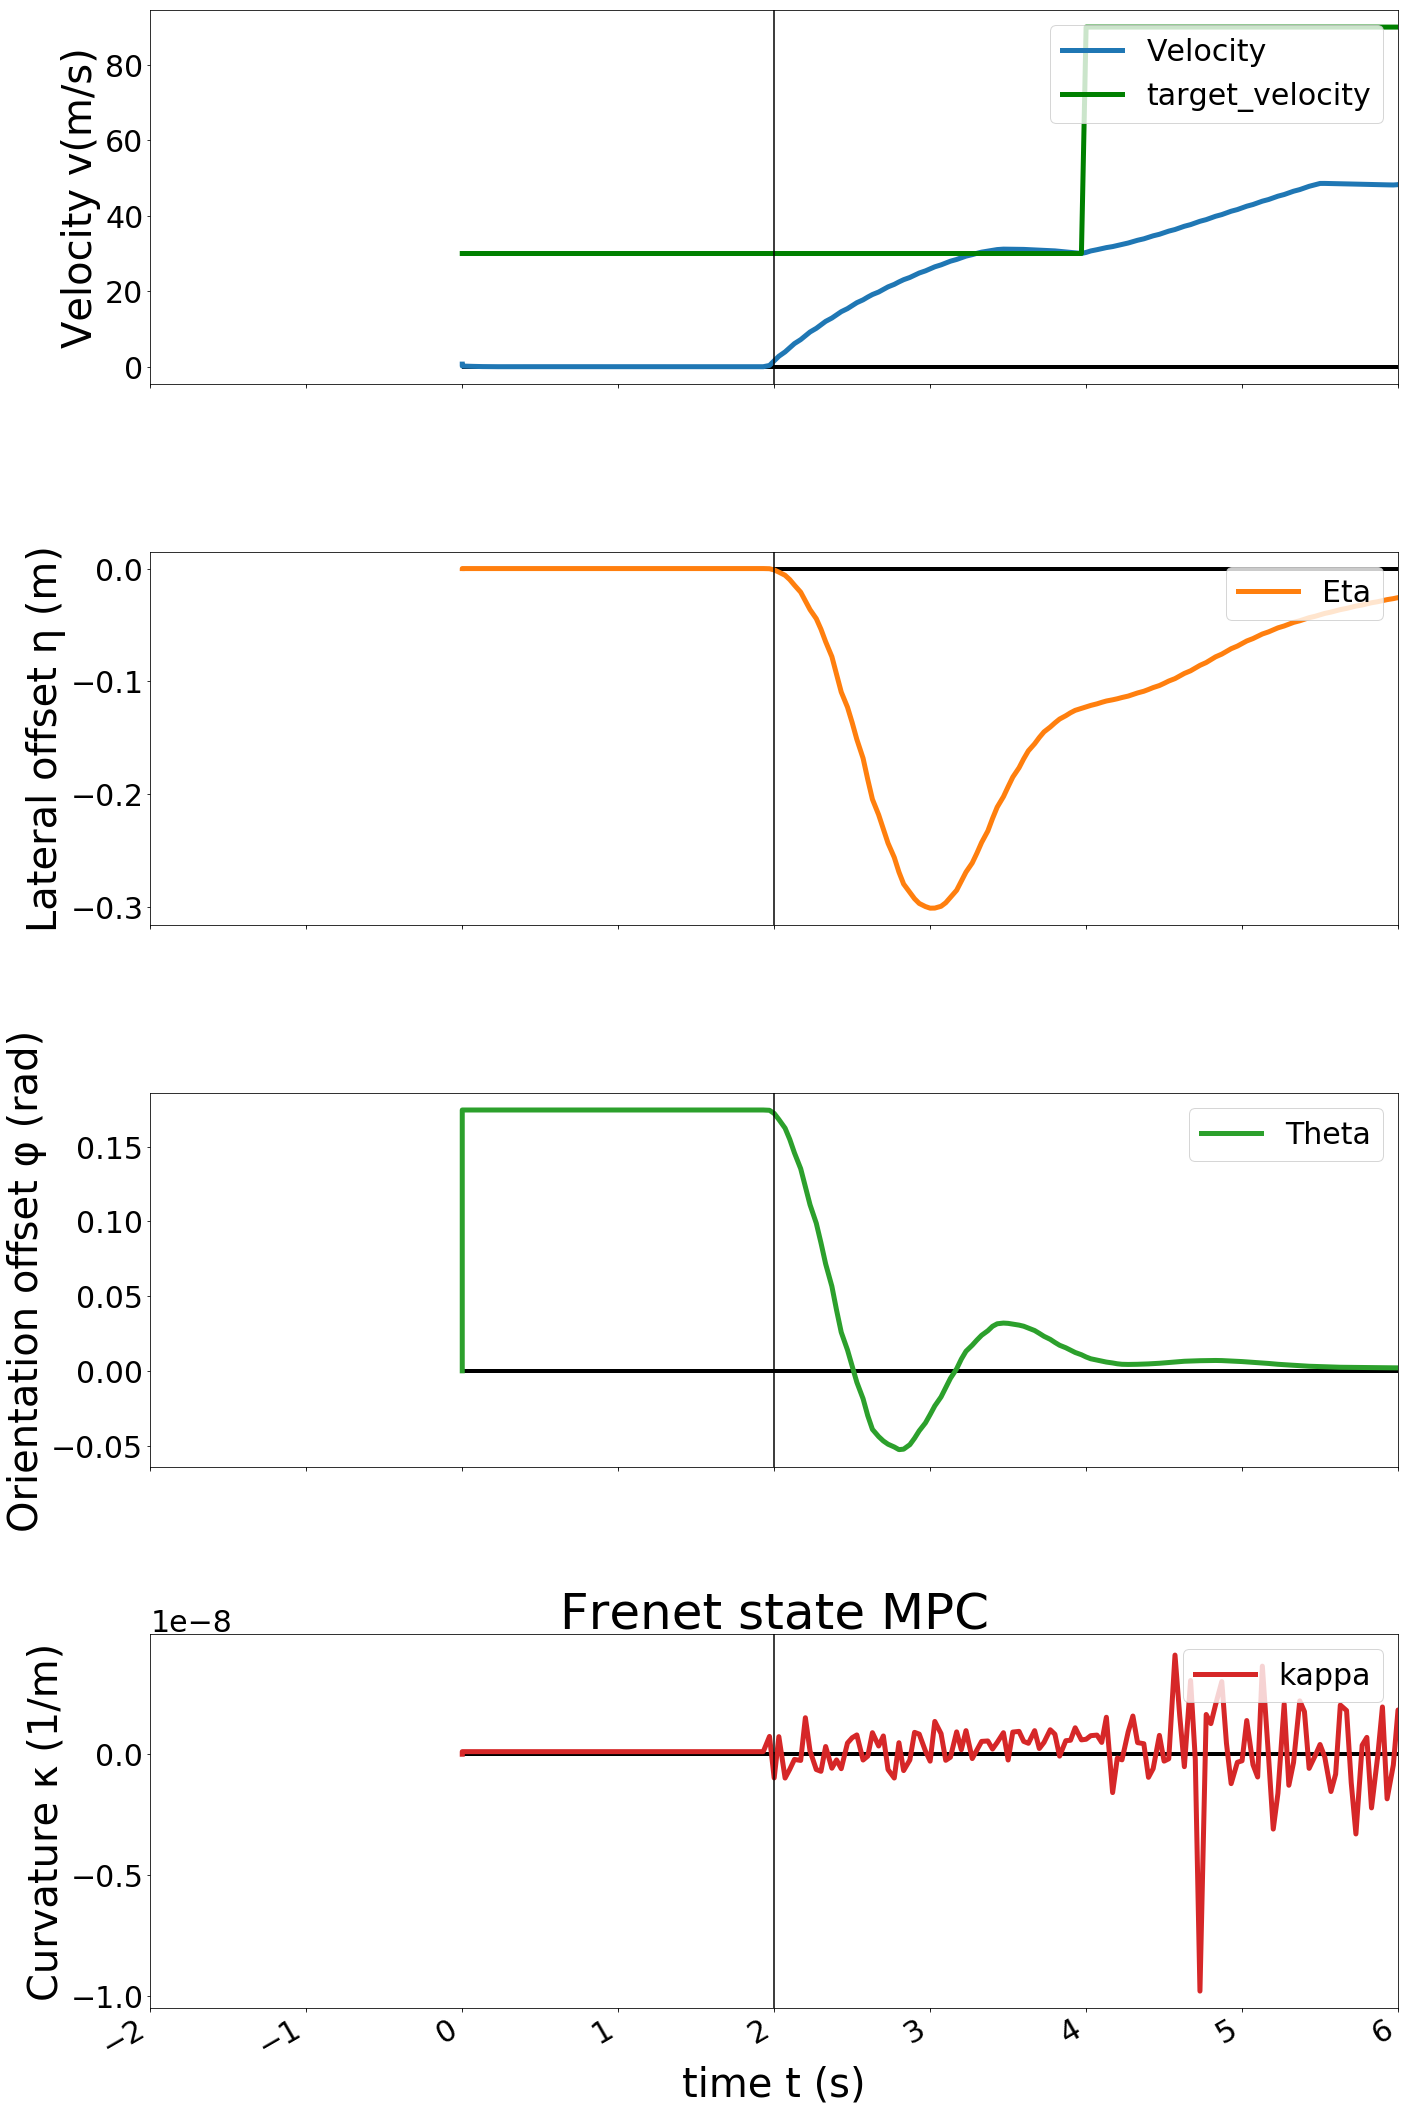

In [8]:
vis.plot_frenet_states(file5, time=2)
#plt.xlim(0, 180)
plt.savefig('plots/manual_auslenkung.pdf')

## Visualization of the prediction 

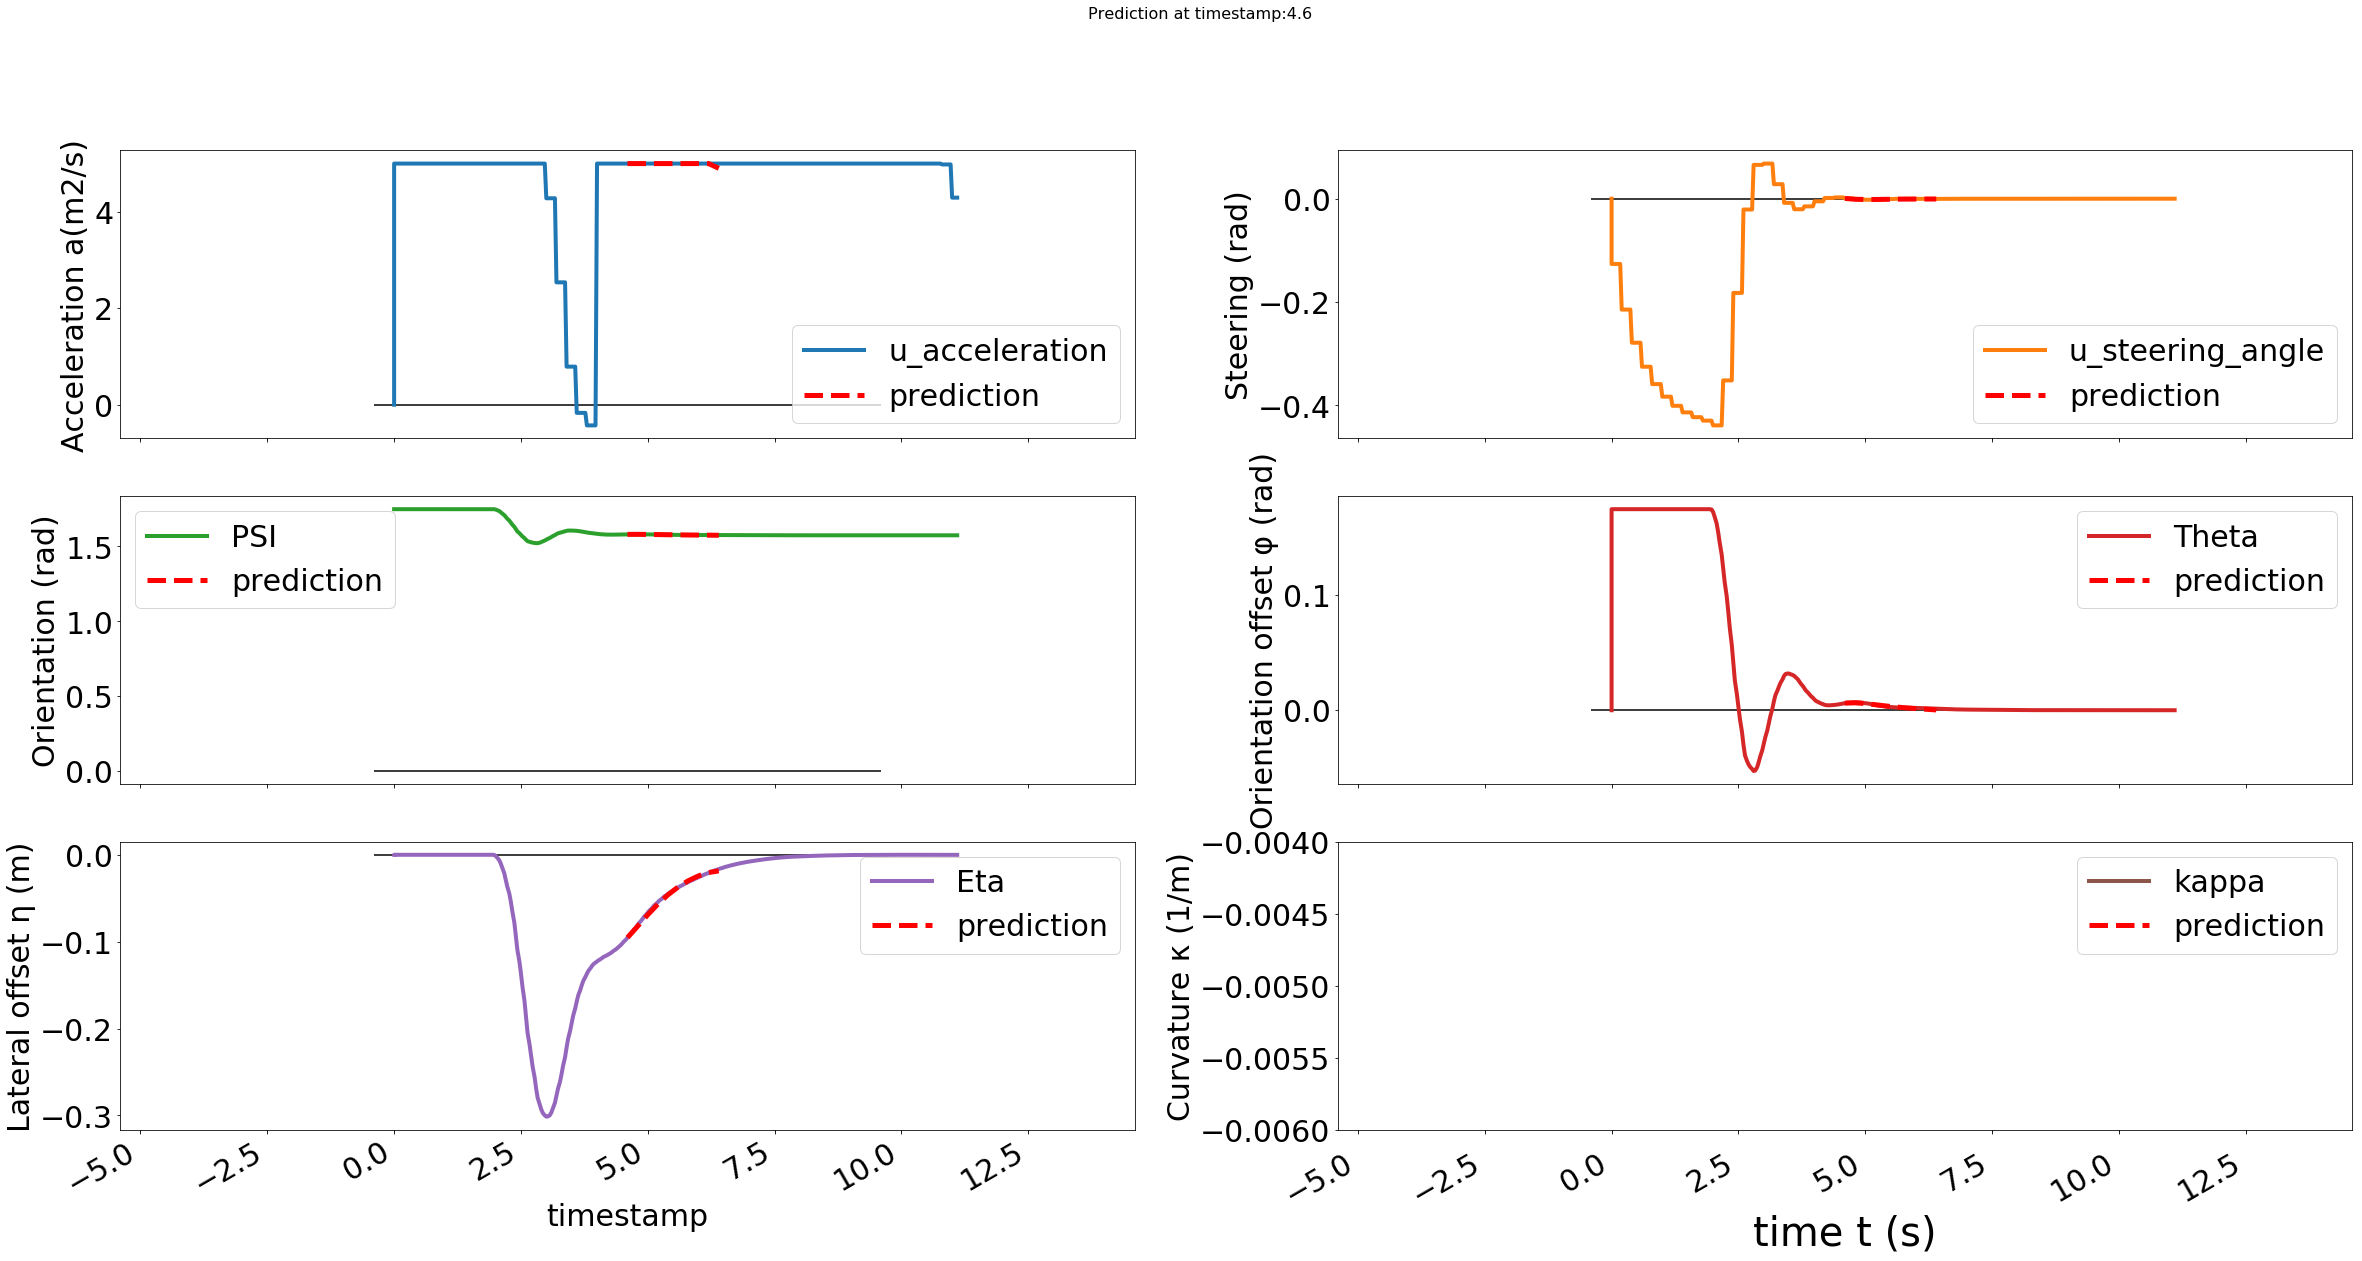

In [9]:
t = 4.6
vis.plot_prediction_at_time(file5, time=t)
plt.xlim(t-10,t+10)
plt.ylim(-0.006,-0.004)
plt.savefig('prediction_visualization_5.pdf')

In [6]:
data = vis.read_log_informations(file3)

time = 24.0
labels = ['X', 'Y', 'PSI', 'Velo', 'Xi', 'ETA', 'Theta', 'u0', 'u1', 'kappa', 'velocity_int']
data.loc[time]['pred_states']
data_pred_at_t = pd.DataFrame(data.loc[time]['pred_states'], columns=labels)
data_pred_at_t

,X,Y,PSI,Velo,Xi,ETA,Theta,u0,u1,kappa,velocity_int
0,14.993271,257.527832,1.368076,23.992331,0.000000,0.102871,0.004782,3.031969,-0.017603,-0.005311,0.339584
1,16.009921,262.217363,1.340883,24.591962,4.795760,0.074146,0.003056,2.998153,-0.021533,-0.005358,0.541117
2,17.176003,266.995526,1.316417,25.068440,9.712099,0.042692,0.004932,2.382393,-0.018901,-0.005395,0.622725
3,18.482880,271.835891,1.291802,25.383037,14.724584,0.020649,0.007360,1.572982,-0.018655,-0.005421,0.609037
4,19.928589,276.702293,1.265669,25.544663,19.800608,0.008358,0.008745,0.808131,-0.019560,-0.005435,0.532430
5,21.512860,281.559378,1.238326,25.585998,24.909304,0.001082,0.009165,0.206674,-0.020336,-0.005435,0.423497
6,23.233339,286.378682,1.210250,25.546516,30.026469,-0.005363,0.008900,-0.197409,-0.020847,-0.005421,0.306297
7,25.086812,291.139944,1.181513,25.461874,35.135913,-0.014494,0.007862,-0.423208,-0.021371,-0.005394,0.196994
8,27.071582,295.829610,1.151815,25.358458,40.228659,-0.030886,0.005636,-0.517081,-0.022159,-0.005354,0.104619
9,29.188115,300.438552,1.121076,25.251718,45.301102,-0.060708,0.002057,-0.533700,-0.023029,-0.005302,0.032928


In [7]:
alpha = lambda u: np.arctan((lr / (lf + lr)) * np.tan(u[1]))
lr = 1.9
lf = 1.9
def eta_pred(T, eta, theta, delta, velocity):
    return eta + T * (velocity * np.sin(theta + np.arctan((lr / (lf + lr)) * np.tan(delta)) ))

for i in range(9):
    print("Prediction eta: ", eta_pred(0.2, data_pred_at_t.loc[i]['ETA'], data_pred_at_t.loc[i]['Theta'], data_pred_at_t.loc[i]['u1'], data_pred_at_t.loc[i]['Velo']))
    print('ETA from casADi: ', data_pred_at_t.loc[i+1]['ETA'])
    print('--------------------------------')
    


Prediction eta:  0.08357905354548255
ETA from casADi:  0.07414626244709373
--------------------------------
Prediction eta:  0.03621741389647994
ETA from casADi:  0.04269234550651085
--------------------------------
Prediction eta:  0.020031941508084815
ETA from casADi:  0.020648595337260232
--------------------------------
Prediction eta:  0.010655421645525631
ETA from casADi:  0.008358364641930958
--------------------------------
Prediction eta:  0.003065010008204655
ETA from casADi:  0.0010820795565960439
--------------------------------
Prediction eta:  -0.0040550181329902036
ETA from casADi:  -0.005362781946707031
--------------------------------
Prediction eta:  -0.013154303046685821
ETA from casADi:  -0.014493656872702819
--------------------------------
Prediction eta:  -0.028877860722541476
ETA from casADi:  -0.030885664245717172
--------------------------------
Prediction eta:  -0.05850162983636349
ETA from casADi:  -0.0607075477197775
--------------------------------


# Compare MPC for Kappa function and without

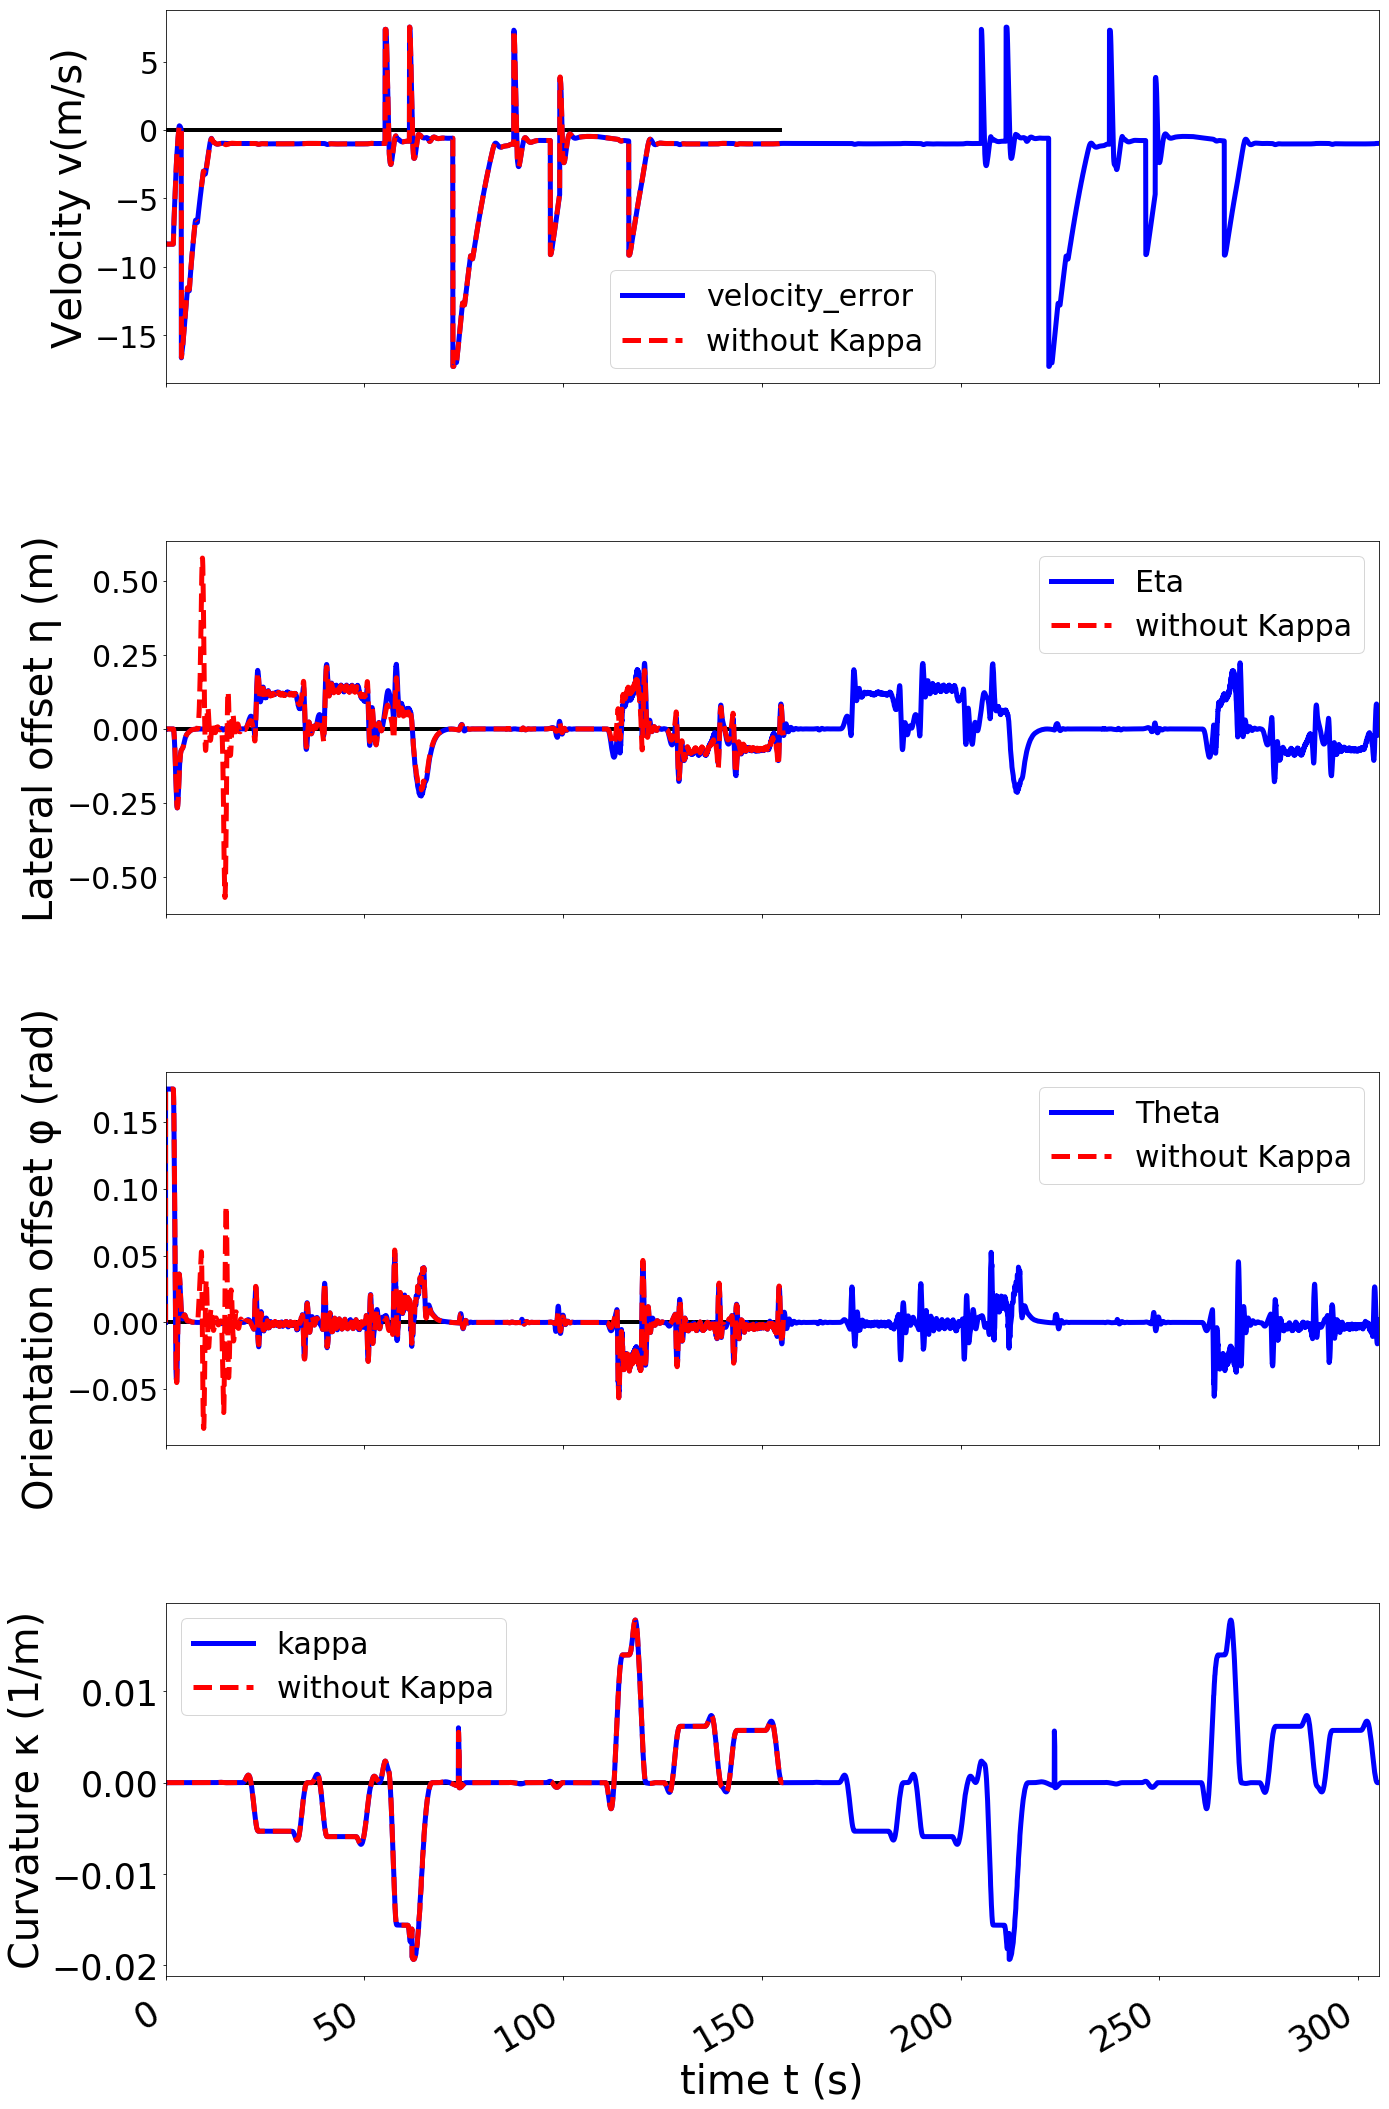

In [8]:
vis.compare_errors(file2, file5, txt='without Kappa')